In [1]:
import os
print(os.getcwd())

os.chdir('Downloads')
os.listdir()

C:\Users\Radwa samir


['.ipynb_checkpoints',
 'Anaconda3-2023.07-2-Windows-x86_64.exe',
 'CC GENERAL.csv',
 'CV.docx',
 'data-visualization (1) (1).html',
 'data-visualization (1) (1).ipynb',
 'data-visualization (1) (1).zip',
 'data-visualization (1).ipynb',
 'Decision Trees & Random Forests (1).ipynb',
 'Decision Trees & Random Forests.ipynb',
 'desktop.ini',
 'iBeacon s.pdf',
 'iris.data.txt',
 'kc_house_data.csv',
 'knn.ipynb',
 'Logistic Regression (1).ipynb',
 'Logistic Regression.ipynb',
 'logistic_regression_dataset.csv',
 'p1.ipynb',
 'Presentation 6 (1).pptx',
 'Presentation 6 (2).pptx',
 'Presentation 6.pptx',
 'python1.ipynb',
 'radwa-samir.docx',
 'Regression  (1).ipynb',
 'Regression .ipynb',
 'scatter_data.csv',
 'temp-plot.html',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3 (1).ipynb',
 'Untitled3 (2).ipynb',
 'used cars.csv',
 'Video_games.csv']

In [2]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


C:\Users\Radwa samir\AppData\Local\Temp\ipykernel_22732\710653592.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


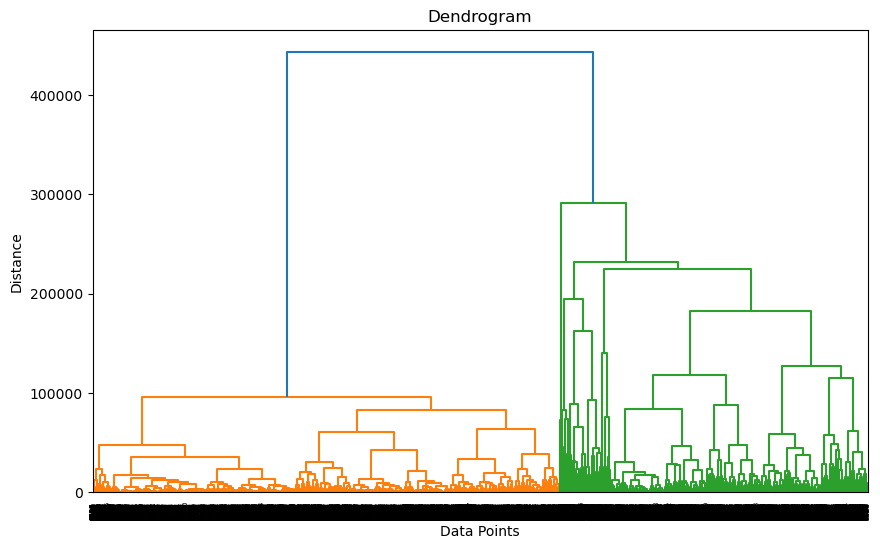

In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)  

Z = linkage(df.iloc[:, 1:], method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

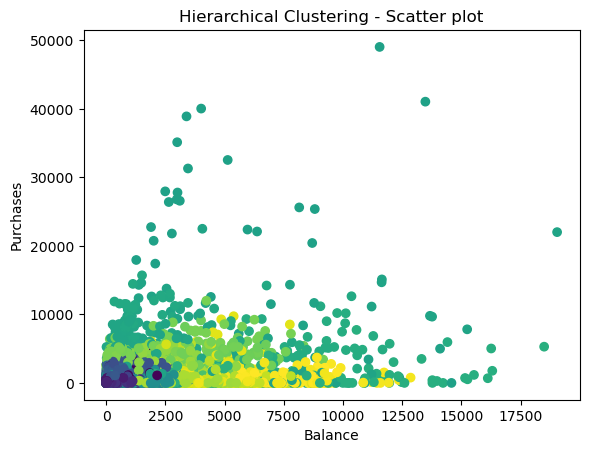

In [4]:
from scipy.cluster.hierarchy import fcluster

threshold = 100  
clusters = fcluster(Z, threshold, criterion='distance')

# Plot the clusters
plt.scatter(df['BALANCE'], df['PURCHASES'], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering - Scatter plot')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

C:\Users\Radwa samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Radwa samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Radwa samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Radwa samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

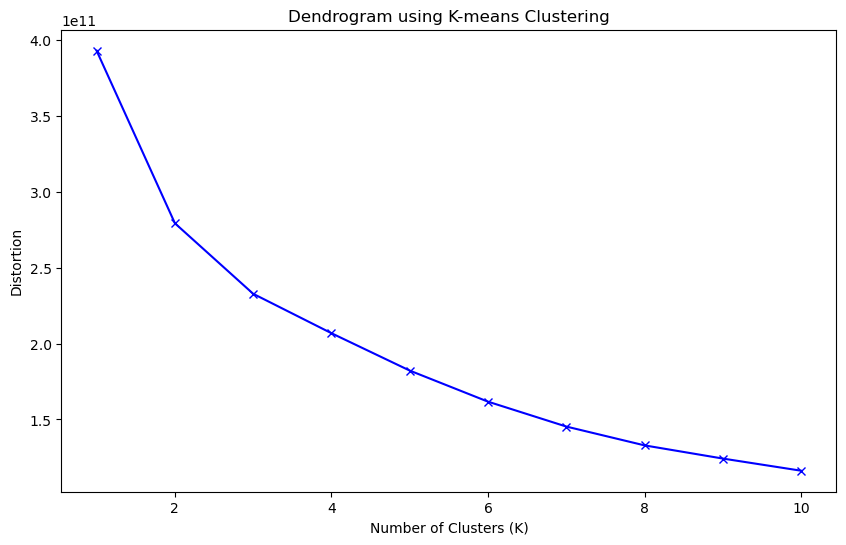

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:, 1:])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.title('Dendrogram using K-means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

C:\Users\Radwa samir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


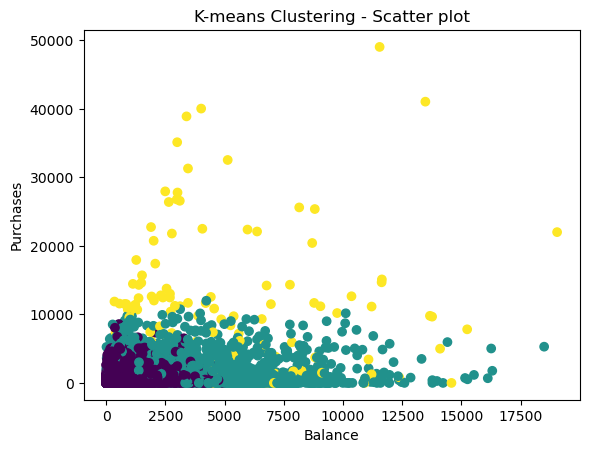

In [9]:
bK = 3  
kmeans = KMeans(n_clusters=bK)
kmeans.fit(df.iloc[:, 1:])
labels = kmeans.labels_

plt.scatter(df['BALANCE'], df['PURCHASES'], c=labels, cmap='viridis')
plt.title('K-means Clustering - Scatter plot')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.iloc[:, 1:], labels)

print("Silhouette score:", silhouette_avg)


Silhouette score: 0.4661965248277404
